In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import numpy as np

In [9]:
df = pd.read_csv('Resources/cleaned_data_map.csv')
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,23.10,85,85,0,99.333333


In [10]:
X = df.drop('CHDRisk', axis=1)
y = df['CHDRisk']

In [11]:
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(df.drop('CHDRisk', axis=1), df['CHDRisk'])

y = y_resampled
X = X_resampled

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [13]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [14]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [15]:
print(pca.explained_variance_ratio_)

[0.19387157 0.13073444 0.11464326 0.07919824 0.07769315 0.07167895
 0.07002064 0.06275315 0.0568835  0.04873343 0.04017019 0.0217694
 0.01817763 0.01367244]


In [16]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [17]:
# Loadings (principal component coefficients)
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(n_components)])

# Explained variance
explained_variance = pd.DataFrame({'Explained Variance': explained_variance, 'Cumulative Variance': cumulative_variance})

# Print the loadings and explained variance
print("Loadings:")
print(loadings)
print("\nExplained Variance:")
print(explained_variance)

Loadings:
                      PC1       PC2       PC3       PC4       PC5       PC6  \
sex             -0.165219  0.332304 -0.134646 -0.393064  0.351859 -0.248874   
age              0.349271 -0.005744 -0.096727 -0.280458  0.018780  0.201786   
education       -0.112698 -0.070570  0.064496  0.526677  0.154118 -0.647524   
smokingStatus   -0.355215  0.473181 -0.168768  0.091698 -0.055948  0.126440   
cigsPerDay      -0.334553  0.515920 -0.204083  0.031534 -0.010413  0.068057   
BPMeds           0.182828  0.077604 -0.079378  0.448972  0.382695  0.118965   
prevalentStroke  0.055643 -0.002870 -0.037201  0.250564  0.558424  0.534803   
prevalentHyp     0.408012  0.163553 -0.314070  0.093560  0.055910 -0.202433   
diabetes         0.191840  0.347844  0.582208 -0.008549  0.047948 -0.027770   
totChol          0.194141  0.077202 -0.072617  0.160022 -0.272615  0.180724   
BMI              0.292388  0.134092 -0.153412 -0.235601  0.035202 -0.164839   
heartRate        0.100930  0.222117 -0.079

## Features with Lowest Contributions
Based on the absolute loadings across all principal components, the features with consistently low contributions include:
* sex: Has relatively low loadings across most components except for PC2 and PC4.
* BPMeds: Moderate influence on PC5 and PC6, but low contributions overall.
* prevalentStroke: Generally low loadings across all components.
* heartRate: Some influence on PC4 and PC5, but lower contributions overall.

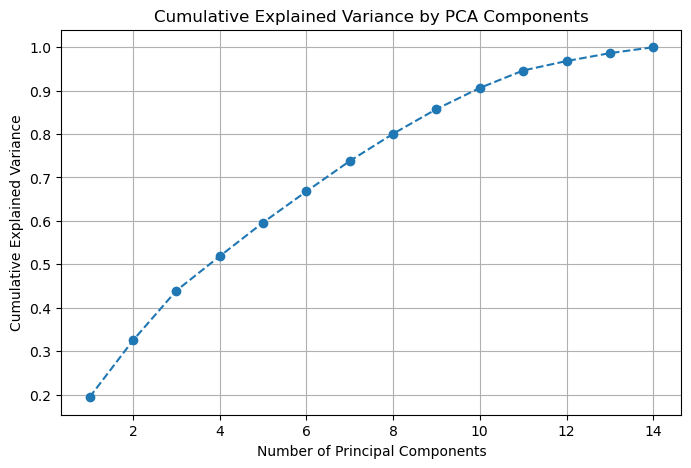

In [20]:
import matplotlib.pyplot as plt

# Plot the cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.savefig('cumulative_variance_plot.png')
plt.show()


In [19]:
plt.savefig('cumulative_variance_plot.png') 

<Figure size 640x480 with 0 Axes>